In [1]:
%matplotlib inline
import sys
import os
import numpy as np
import h5py
import argparse
from mpi4py import MPI

from coffee import ibvp, actions, solvers, grid
from coffee.diffop import fd
from coffee.diffop.sbp import sbp

import g_wave
import g_wave_plotter as gw_plotter

np.set_printoptions(threshold=np.inf, precision=16)

In [2]:
N      = 400
a      = 32.
A      = 4.
pl     = [0.]
pr     = [0.]

tau    = 1.
CFL    = 0.2

zstart = -2.
zstop  = 2.
tstart = 0.
tstop  = 1.

store_output = False
filename     = "{N}.hdf"

display_output = True

In [3]:
diffop = sbp.D43_Strand(sbp.BOUNDARY_TYPE_GHOST_POINTS)

In [4]:
dims = MPI.Compute_dims(MPI.COMM_WORLD.size, [0])                                    
periods = [0]                                                                        
reorder = True                                                                       
mpi_comm = MPI.COMM_WORLD.Create_cart(dims, periods=periods, reorder=reorder)        


In [5]:
ghost_points = (diffop.ghost_points(),)
internal_points = (diffop.internal_points(),)
b_data = grid.MPIBoundary(
    ghost_points, 
    internal_points, 
    mpi_comm=mpi_comm, 
    number_of_dimensions=1
)

grid = grid.UniformCart(
        (N,), 
        [[zstart,zstop]],
        comparison = N,
        mpi_comm = mpi_comm,
        boundary_data=b_data
    )

global_z = np.linspace(zstart, zstop, N+1)

In [6]:
system = g_wave.G_wave(\
        diffop, tau, global_z, 
        CFL = CFL, 
        amplitude = a,
        A=A,
        pl = pl, pr = pr
        )

In [7]:
solver = solvers.RungeKutta4(system)
maxIteration = 10000000

In [8]:
if store_output and mpi_comm.rank==0:
    hdf_file = h5py.File(filename, "w")

In [9]:
output_actions = [
    actions.SimOutput.Data(),
    actions.SimOutput.Times()
    ]

/home/chris/pCloudDrive/PCLOUD/Talks/Workshop_NZ_Gravity_SS_2023/GW_Workshop/Lab1/g_wave_plotter.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


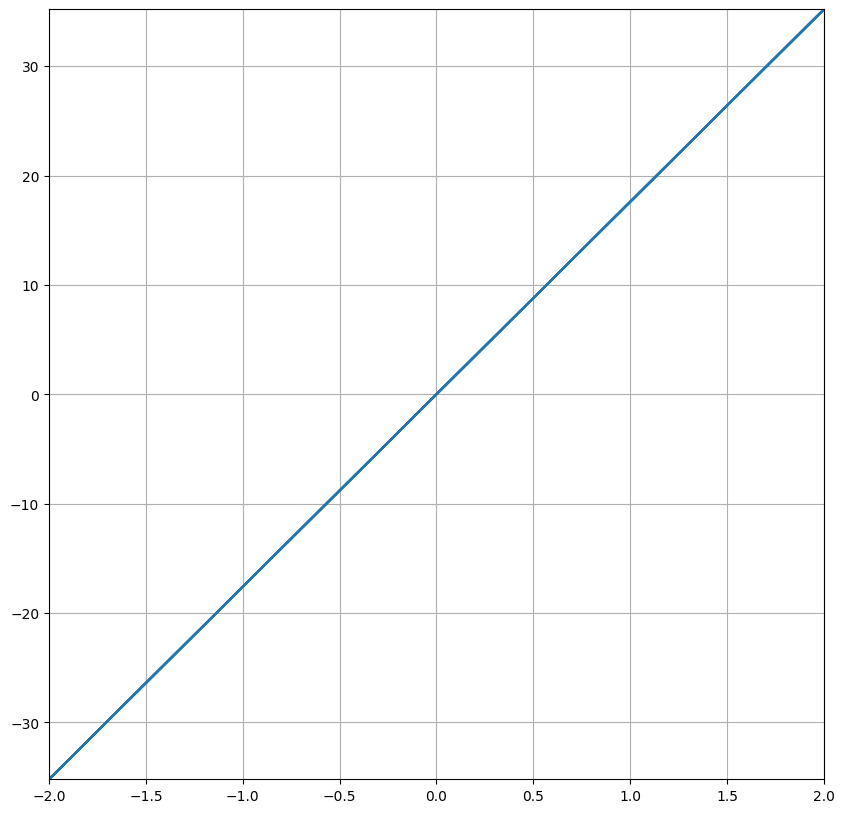

In [10]:
    actionList = []
    if store_output and mpi_comm.rank == 0:
        actionList += [actions.SimOutput(\
            hdf_file,\
            solver, \
            system, \
            grid, \
            output_actions,\
            overwrite = True,\
            name = grid.name,\
            cmp_ = grid.comparison\
            )]
    if display_output and mpi_comm.rank == 0:
        actionList += [gw_plotter.Plotter(
            system,
            frequency = 10, 
            xlim = (zstart, zstop),
            ylim = [-a*1.1, a*1.1], 
            findex = (7,8,3,4,5,6,2), 
            delay = 0.0001
        )]
    problem = ibvp.IBVP(solver, system, grid = grid,\
            maxIteration = 1000000, action = actionList,\
            minTimestep = 1e-6)

In [11]:
problem.run(tstart, tstop)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>